# Project 2 - Ames Housing Data and Kaggle Challenge


### Contents:
---
- [Data Import & Cleaning](#Data_Import_&_Cleaning)
- [EDA](#Exploratory_Data_Analysis)

## Data_Import_&_Cleaning

In [1]:
# library for use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
## Reading in the data set
df_train = pd.read_csv('./datasets/train.csv')
## Training set
## Testing set
df_test = pd.read_csv('./datasets/test.csv')  ## don't remove rows of testing set
test_id = df_test['Id'].to_frame()
## Save the ['Id'] as dataframe
Sale = (df_train['SalePrice'])
print(df_train.shape)
print(df_test.shape)
print(Sale.mean())

(2051, 81)
(878, 80)
181469.70160897123


In [3]:
## Checking for nulls values and types error
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               878 non-null    int64  
 1   PID              878 non-null    int64  
 2   MS SubClass      878 non-null    int64  
 3   MS Zoning        878 non-null    object 
 4   Lot Frontage     718 non-null    float64
 5   Lot Area         878 non-null    int64  
 6   Street           878 non-null    object 
 7   Alley            58 non-null     object 
 8   Lot Shape        878 non-null    object 
 9   Land Contour     878 non-null    object 
 10  Utilities        878 non-null    object 
 11  Lot Config       878 non-null    object 
 12  Land Slope       878 non-null    object 
 13  Neighborhood     878 non-null    object 
 14  Condition 1      878 non-null    object 
 15  Condition 2      878 non-null    object 
 16  Bldg Type        878 non-null    object 
 17  House Style     

In [5]:
df_train.rename(str.lower, axis = 'columns', inplace = True)
df_test.rename(str.lower, axis = 'columns', inplace = True)

In [6]:
df_train.columns = df_train.columns.str.replace(' ', '_')
df_test.columns = df_test.columns.str.replace(' ', '_')

In [7]:
df_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
## Handling the nulls and error
# Lot Frontage: Linear feet of street connected to property
# Lot Frontage is important when buying realestate more land more value
# All home have some type of Lot frontage so I will be adding the mean to it.
df_train['lot_frontage'].fillna(df_train['lot_frontage'].mean(), inplace = True)
df_test['lot_frontage'].fillna(df_test['lot_frontage'].mean(), inplace = True)

In [9]:
## alley (Nominal): Type of alley access to property

df_train['alley'].value_counts(), df_test['alley'].value_counts()

(Grvl    85
 Pave    55
 Name: alley, dtype: int64,
 Grvl    35
 Pave    23
 Name: alley, dtype: int64)

In [10]:
## too many columns with null values are alley with no access
df_train['alley'].fillna('NA', inplace = True)
df_test['alley'].fillna('NA', inplace = True)

In [11]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

In [12]:
## Mas Vnr Type (Nominal): Masonry veneer type
df_train['mas_vnr_type'].fillna('NA', inplace = True)
df_test['mas_vnr_type'].fillna('NA', inplace = True)

In [13]:
## Mas Vnr Area (Continuous): Masnory Venner area in square feet
## all the null value have no Venner 
df_train['mas_vnr_area'].fillna(0, inplace = True)
df_test['mas_vnr_area'].fillna(0, inplace = True)

In [14]:
## Bsmt Qual (Ordinal): Evaluates the height of the basement 
## replace all the nan with 0 because there are no basement on nan
df_train['bsmt_qual'].fillna('NA', inplace = True)
df_test['bsmt_qual'].fillna('NA', inplace = True)

## Bsmt Cond (Ordinal): Evaluates the general condition of the basement 
# (same as above)
df_train['bsmt_cond'].fillna('NA', inplace = True)
df_test['bsmt_cond'].fillna('NA', inplace = True)

## Bsmt Exposure (Ordinal): Refers to walkout or garden level walls
## No basement for N/A
df_train['bsmt_exposure'].fillna('NA', inplace = True)
df_test['bsmt_exposure'].fillna('NA', inplace = True)

# BsmtFin Type 1 (Ordinal): Rating of basement finished area
# No Basement for NA
df_train['bsmtfin_type_1'].fillna('NA', inplace = True)
df_test['bsmtfin_type_1'].fillna('NA', inplace = True)

## BsmtFinType 2(Ordinal): Rating of basement finished area (if multiple types)
# nan for no basement 
# set(df_train['BsmtFin Type 2'])
df_train['bsmtfin_type_2'].fillna('NA', inplace = True)
df_test['bsmtfin_type_2'].fillna('NA', inplace = True)

#### All the columns below either have 1 null value or two values
----
I am going to either put a mean on continous and mode on discrete because it won't make too much of difference to the model

In [15]:
## BsmtFin SF 1 (Continuous): Type 1 finished square feet
## BsmtFin SF 1 One null value on the 1 index
df_train['bsmtfin_sf_1'].fillna(df_train['bsmtfin_sf_1'].mean(), inplace = True)
df_test['bsmtfin_sf_1'].fillna(df_test['bsmtfin_sf_1'].mean(), inplace = True)

## BsmtFin SF 2 (Continuous): Type 2 finished square feet
# set(df_train['BsmtFin SF 2'])
# one null value 1 index
df_train['bsmtfin_sf_2'].fillna(df_train['bsmtfin_sf_2'].mean(), inplace = True)
df_test['bsmtfin_sf_2'].fillna(df_test['bsmtfin_sf_2'].mean(), inplace = True)

## Bsmt Unf SF (Continuous): Unfinished square feet of basement area
# set(df_train['Bsmt Unf SF'])
# one null value on the 1 index
df_train['bsmt_unf_sf'].fillna(df_train['bsmt_unf_sf'].mean(), inplace = True)
df_test['bsmt_unf_sf'].fillna(df_test['bsmt_unf_sf'].mean(), inplace = True)

## Total Bsmt SF (Continuous): Total square feet of basement area
## set(df_train['Total Bsmt SF'])
## one null value 
df_train['total_bsmt_sf'].fillna(df_train['total_bsmt_sf'].mean(), inplace = True)
df_test['total_bsmt_sf'].fillna(df_test['total_bsmt_sf'].mean(), inplace = True)

## Bsmt Full Bath (Discrete): Basement full bathrooms
# set(df_train['Bsmt Full Bath'])
## two null values
df_train['bsmt_full_bath'].fillna(df_train['bsmt_full_bath'].mode()[0], inplace = True)
df_test['bsmt_full_bath'].fillna(df_test['bsmt_full_bath'].mode()[0], inplace = True)

## Bsmt Half Bath (Discrete): Basement half bathrooms
# set(df_train['Bsmt Half Bath'])
## two null values
df_train['bsmt_half_bath'].fillna(df_train['bsmt_half_bath'].mode()[0], inplace = True)
df_test['bsmt_half_bath'].fillna(df_test['bsmt_half_bath'].mode()[0], inplace = True)


In [16]:
## FireplaceQu (Ordinal): Fireplace quality
df_train['fireplace_qu'].fillna('NA', inplace = True)
df_test['fireplace_qu'].fillna('NA', inplace = True)

## Garage Type (Nominal): Garage location
df_train['garage_type'].fillna('NA', inplace = True)
df_test['garage_type'].fillna('NA', inplace = True)

## Garage Yr Blt (Discrete): Year garage was built
## for nan year for garage built put mean instead of nan
df_train['garage_yr_blt'].fillna(df_train['garage_yr_blt'].mode()[0], inplace = True)
df_test['garage_yr_blt'].fillna(df_test['garage_yr_blt'].mode()[0], inplace = True)

## Garage Finish (Ordinal)	: Interior finish of the garage
df_train['garage_finish'].fillna('NA', inplace = True)
df_test['garage_finish'].fillna('NA', inplace = True)


In [17]:
## Garage Cars (Discrete): Size of garage in car capacity
df_train['garage_cars'].fillna(df_train['garage_cars'].mode()[0], inplace = True)
df_test['garage_cars'].fillna(df_train['garage_cars'].mode()[0], inplace = True)


## Garage Area (Continuous): Size of garage in square feet
df_train['garage_area'].fillna(df_train['garage_area'].mean(), inplace = True)

## Garage Qual (Ordinal): Garage quality
df_train['garage_qual'].fillna('NA', inplace = True)
df_test['garage_qual'].fillna('NA', inplace = True)


## Garage Cond (Ordinal): Garage condition
df_train['garage_cond'].fillna('NA', inplace = True)
df_test['garage_cond'].fillna('NA', inplace = True)


In [18]:
## Specific to df_test electrical
df_test['electrical'].fillna(df_test['electrical'].mode()[0], inplace = True)

In [19]:
## All the features below have more than 50 % of the data missing so I am dropping them
## Pool QC (Ordinal): Pool quality
df_train['pool_qc'].fillna('NA', inplace = True)
df_test['pool_qc'].fillna('NA', inplace = True)
## Fence (Ordinal): Fence quality
df_train['fence'].fillna('NA', inplace = True)
df_test['fence'].fillna('NA', inplace = True)
## Misc Feature (Nominal): Miscellaneous feature not covered in other categories
df_train['misc_feature'].fillna('NA', inplace = True)
df_test['misc_feature'].fillna('NA', inplace = True)


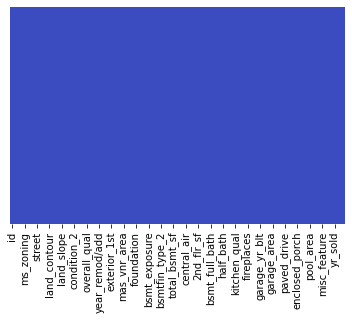

In [20]:
## this heatmap shows that there is no more null values
sns.heatmap(df_train.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm');

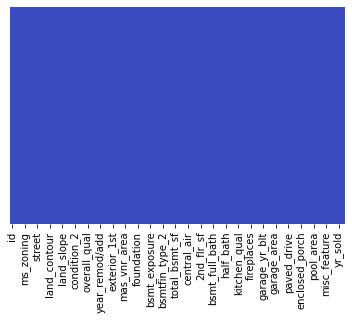

In [21]:
sns.heatmap(df_test.isnull(), yticklabels = False, cbar = False, cmap = 'coolwarm');

In [22]:
df_train.shape, df_test.shape

((2051, 81), (878, 80))

In [23]:
## ALLEY ACCESS or NO ACCESS
alley_access = {'NA': 0, 'Pave': 1, 'Grvl': 1 }
df_train['alley'] = df_train['alley'].replace(alley_access)
df_test['alley'] = df_test['alley'].replace(alley_access)

In [24]:
## REGULAR SHAPE VS IRREGULAR SHAPE
lot_shapes = {'Reg': 0, 'IR1': 1, 'IR2': 1, 'IR3': 1}
df_train['lot_shape'] = df_train['lot_shape'].replace(lot_shapes)
df_test['lot_shape'] = df_test['lot_shape'].replace(lot_shapes)

In [25]:
## HOUSE STYLE
house_styles = {'1Story': 1, '2Story': 2, '1.5Fin': 1, 'SLvl': 0, 'SFoyer': 0, '2.5Unf': 2, '1.5Unf': 1, '2.5Fin': 2}
df_train['house_style'] = df_train['house_style'].replace(house_styles)
df_test['house_style'] = df_test['house_style'].replace(house_styles)

In [26]:
## Fence
fences = {'NA': 0, 'MnPrv': 1, 'GdPrv': 1, 'GdWo': 1, 'MnWw': 1}
df_train['fence'] = df_train['fence'].replace(fences)
df_test['fence'] = df_test['fence'].replace(fences)

In [27]:
## Paved Drive
paved_drives = {'Y': 1, 'P': 1, 'N': 0 }
df_train['paved_drive'] = df_train['paved_drive'].replace(paved_drives)
df_test['paved_drive'] = df_test['paved_drive'].replace(paved_drives)

In [28]:
# Garage Quality
rating = {'Ex': 2, 'Gd': 2, 'TA':1 , 'Fa': 1, 'Po': 1, 'NA': 0}
df_train['garage_qual'] = df_train['garage_qual'].replace(rating)
df_test['garage_qual'] = df_test['garage_qual'].replace(rating)

# Garage Cond
df_train['garage_cond'] = df_train['garage_cond'].replace(rating)
df_test['garage_cond'] = df_test['garage_cond'].replace(rating)


In [29]:
## Central Air
centralair = {'N': 0, 'Y': 1}
df_train['central_air'] = df_train['central_air'].replace(centralair)
df_test['central_air'] = df_test['central_air'].replace(centralair)

In [30]:
## Pool QC
pool_qual = {'Ex': 1, 'Gd':1, 'TA': 1, 'Fa': 1, 'NA': 0 }
df_train['pool_qc'] = df_train['pool_qc'].replace(pool_qual)
df_test['pool_qc'] = df_test['pool_qc'].replace(pool_qual)

In [31]:
df_train.to_csv(r'./datasets/updated_train.csv',index = False)
df_test.to_csv(r'./datasets/updated_test.csv',index = False)

## Exploratory_Data_Analysis

#### Summary Statistics

In [32]:
df_train.describe()

,id,pid,ms_subclass,lot_frontage,lot_area,alley,lot_shape,house_style,overall_qual,overall_cond,...,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice
count,2051.000000,2.051000e+03,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,0.068259,0.368601,1.231107,6.112140,5.562165,...,22.571916,2.591419,16.511458,2.397855,0.004388,0.195027,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,21.306357,6742.488909,0.252252,0.482543,0.564155,1.426271,1.104497,...,59.845110,25.229615,57.374204,37.782570,0.066113,0.396318,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,60.000000,7500.000000,0.000000,0.000000,1.000000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,69.055200,9430.000000,0.000000,0.000000,1.000000,6.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,78.000000,11513.500000,0.000000,1.000000,2.000000,7.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,1.000000,1.000000,2.000000,10.000000,9.000000,...,432.000000,508.000000,490.000000,800.000000,1.000000,1.000000,17000.000000,12.000000,2010.000000,611657.000000


In [33]:
# checking the year variable
# 4 year_col
year_col = [col for col in df_train.columns if 'yr' in col or 'year' in col]
year_col

['year_built', 'year_remod/add', 'garage_yr_blt', 'yr_sold']

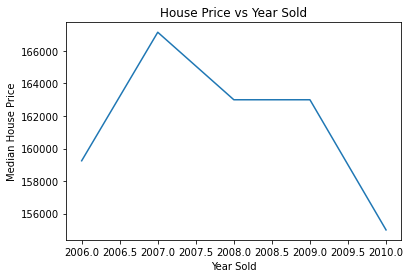

In [34]:
## checking the relation between year and the sale price
df_train.groupby('yr_sold')['saleprice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs Year Sold');

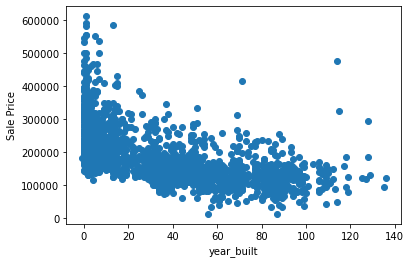

In [35]:
plt.scatter(df_train['yr_sold']-df_train['year_built'], Sale)
plt.xlabel('year_built')
plt.ylabel('Sale Price');

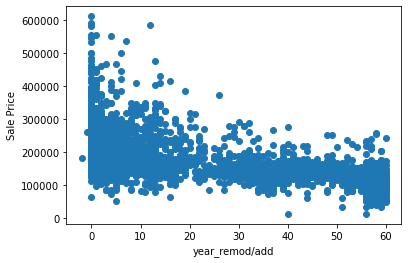

In [36]:
plt.scatter(df_train['yr_sold']-df_train['year_remod/add'], Sale)
plt.xlabel('year_remod/add')
plt.ylabel('Sale Price');

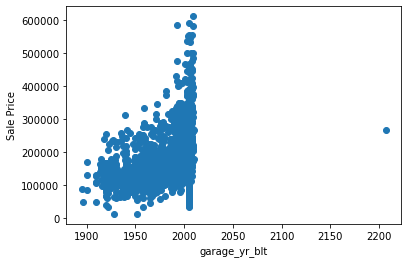

In [37]:
plt.scatter(df_train['garage_yr_blt'], Sale)
plt.xlabel('garage_yr_blt')
plt.ylabel('Sale Price');

In [38]:
## taking care of the outlier by replacing it with the median
df_train['garage_yr_blt'].replace(to_replace = 2207, value = 1985, inplace = True)

### Checking the correlation between sale price and the columns

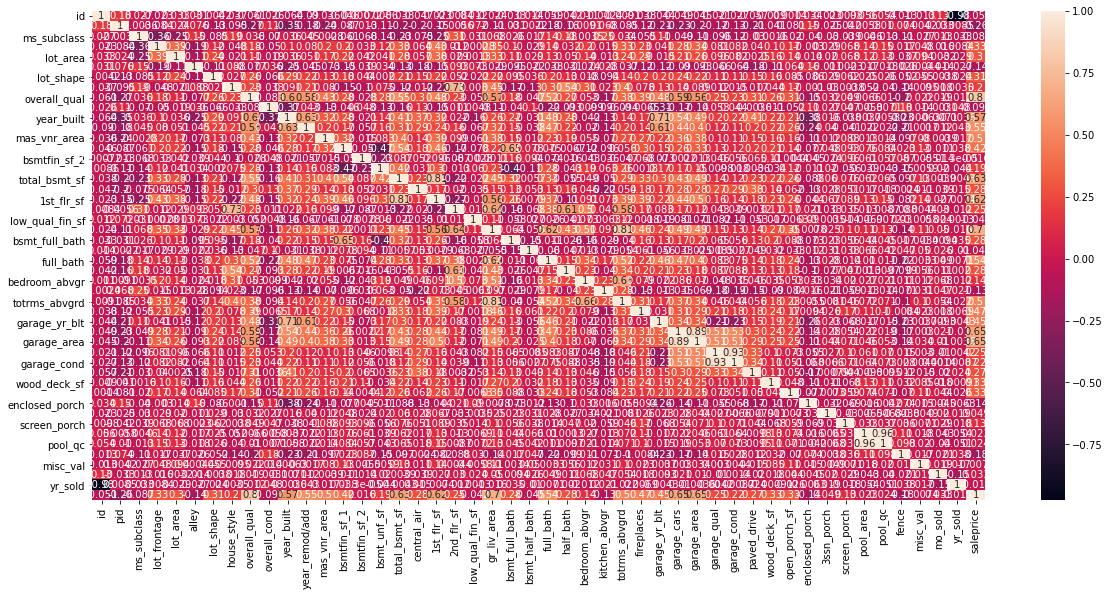

In [39]:
corr = df_train.corr()
plt.subplots(figsize = (20,9))
sns.heatmap(corr, annot = True);

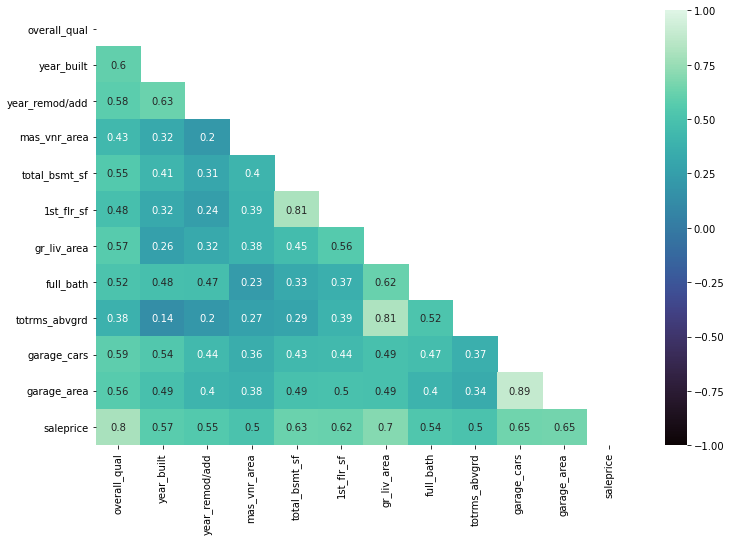

In [40]:
top_feature = corr.index[abs(corr['saleprice'] > 0.5)]
plt.subplots(figsize = (12,8))
corr = df_train[top_feature].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1, cmap = 'mako', mask = mask)
plt.savefig('Images/topfeature.png')
plt.show()

The code below takes a long time to run 

In [41]:
## pariplot for the top features to the saleprice
# col = ['saleprice', 'overall_qual', 'year_built', 'year_remod/add', 'mas_vnr_area', '1st_flr_sf','gr_liv_area', 'full_bath', 'totrms_abvgrd', 'garage_cars', 'garage_area', 'total_bsmt_sf']
# sns.set(style = 'ticks')
# sns.pairplot(df_train[col], height = 3, kind = 'reg');

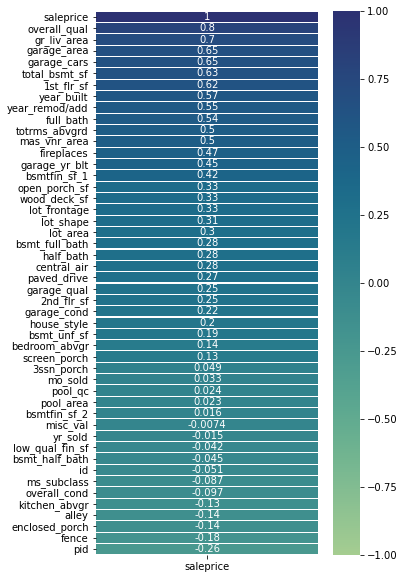

In [42]:
## Seeing the correlation from best to least
corr = df_train.corr()
plt.figure(figsize = (5, 10))
sns.heatmap(corr[['saleprice']].sort_values(by = 'saleprice', ascending = False),
            cmap = 'crest', annot = True,
            vmin = -1, vmax = 1, linecolor = 'w', linewidth = 0.1);
plt.savefig('Images/price_correlation.png', bbox_inches = 'tight');

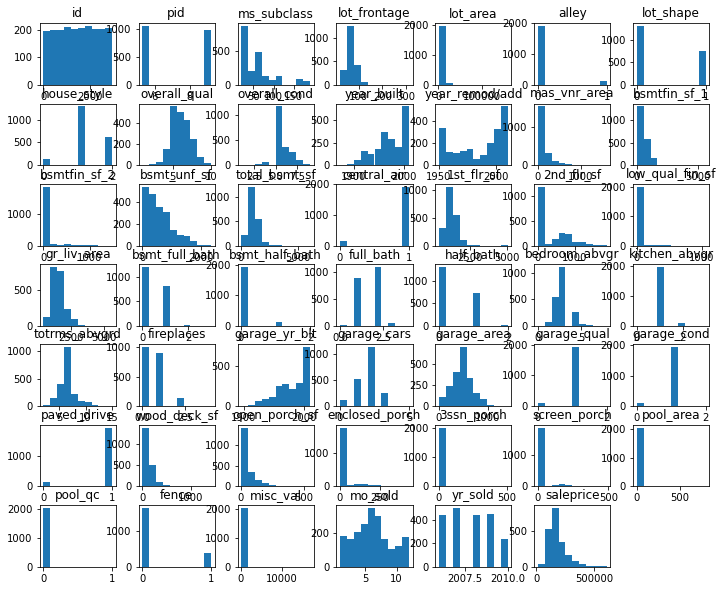

In [43]:
df_train.hist(figsize = (12,10), grid = False);

#### Boxplots 

1. One for SalePrice
2. Overall Qual(strongest predictor to Saleprice)

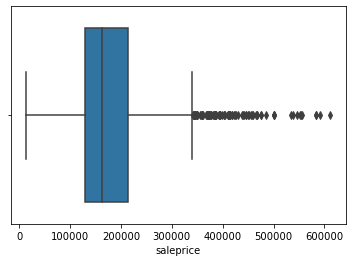

In [44]:
sns.boxplot(x = df_train['saleprice']);

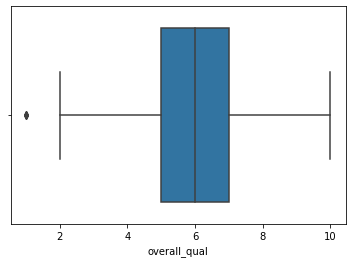

In [45]:
sns.boxplot(x = df_train['overall_qual']);

#### Sale Price Distributions

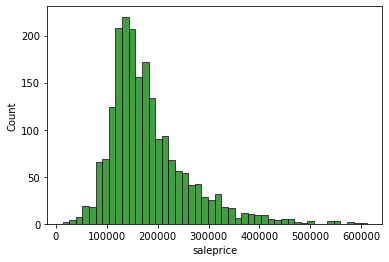

In [46]:
## The Sale Distibution is right skewed, and most house range from 100,000 to 300,000
sns.histplot(df_train.saleprice, color = 'Green')
plt.show();

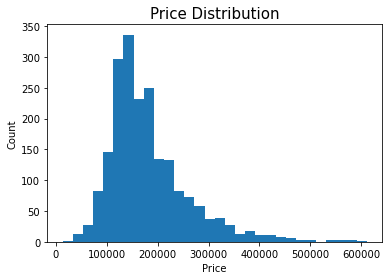

In [47]:
plt.hist(x = df_train['saleprice'], bins = 30);
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price Distribution', size = 15);
plt.savefig('Images/price_distribution.png');

In [48]:
df_train['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

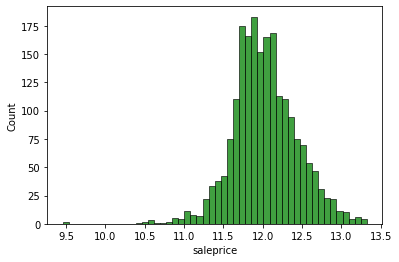

In [49]:
## log sale price distribution
sns.histplot(np.log(df_train.saleprice), color = 'Green')
plt.show()
## outliers at 9.5 

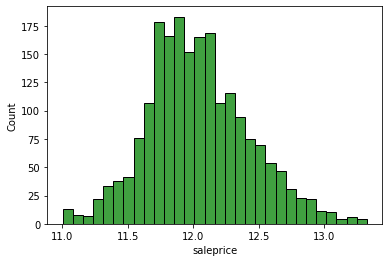

In [50]:
## More normal distribution
df_train = df_train[np.log(df_train['saleprice']) > 11 ]
sns.histplot(np.log(df_train.saleprice), color = 'Green')
plt.show()

#### Location

<AxesSubplot:xlabel='neighborhood', ylabel='saleprice'>

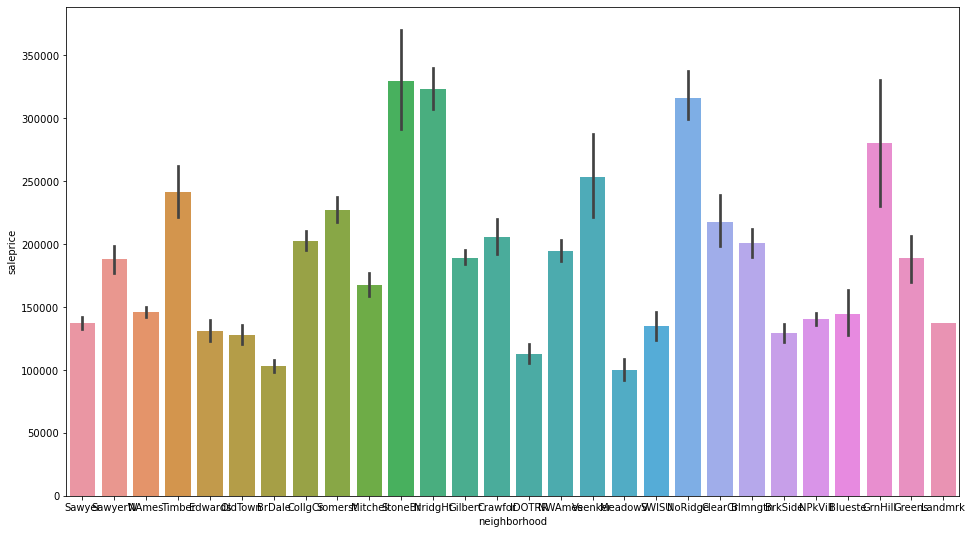

In [51]:
plt.figure(figsize = (16,9))
sns.barplot(x = df_train['neighborhood'], y = df_train['saleprice'])

#### Top Features
1. Overall Qual
2. Gr Liv Area
3. Garage Area  
4. Garage Cars
5. Total Bsmt SF
6. 1st Flr SF
7. Year Built
8. Year Remod/Add
9. Full Bath 
10. TotRms AbvGrd 
11. Mas Vnr Area
12. Fireplaces

0.6325961567936464


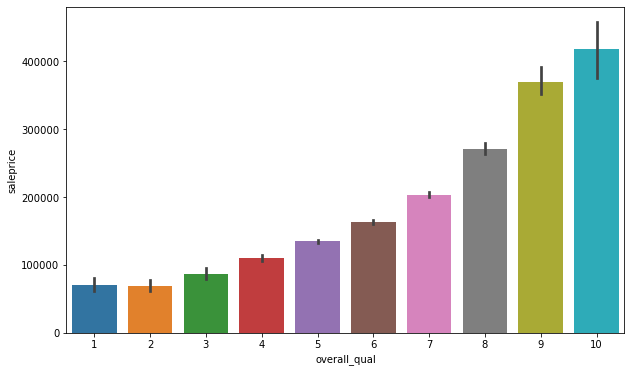

In [52]:
y = df_train['saleprice']
X = df_train[['overall_qual']]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
plt.figure(figsize = (10,6))
sns.barplot(x = df_train['overall_qual'], y = df_train['saleprice']);
plt.savefig('Images/overall_qual.png');

0.21730190367044966


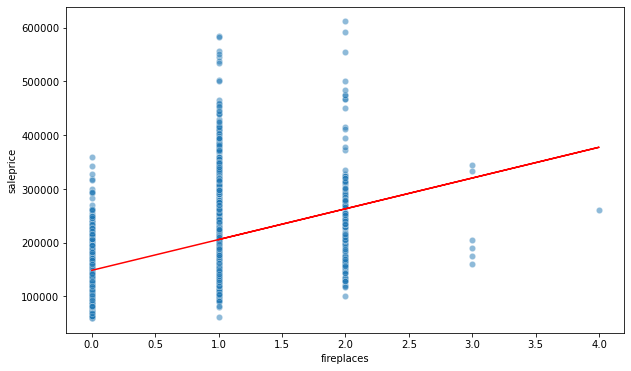

In [53]:
y = df_train['saleprice']
X = df_train[['fireplaces']]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
plt.figure(figsize = (10,6))
sns.scatterplot(x = df_train['fireplaces'], y = df_train['saleprice'], s = 40, alpha = 0.5)
plt.plot(X, y_pred, color = 'red');

0.6325961567936464


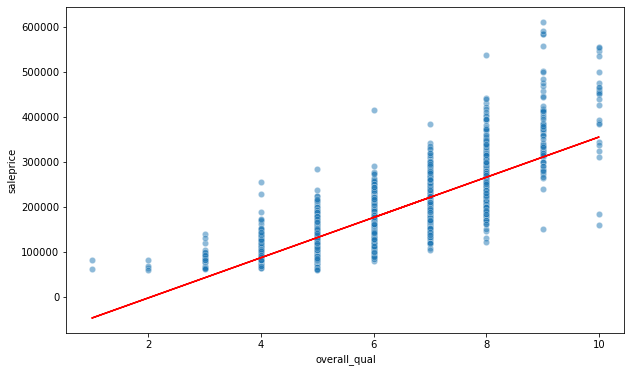

In [54]:
y = df_train['saleprice']
X = df_train[['overall_qual']]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
plt.figure(figsize = (10,6))
sns.scatterplot(x = df_train['overall_qual'], y = df_train['saleprice'], s = 40, alpha = 0.5)
plt.plot(X, y_pred, color = 'red');

0.31654577654928406


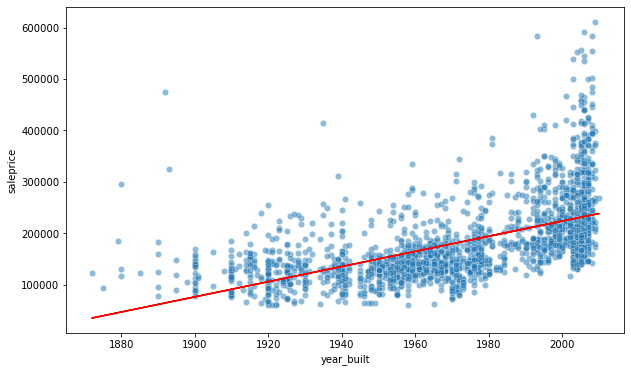

In [55]:
y = df_train['saleprice']
X = df_train[['year_built']]
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)
print(r2_score(y,y_pred))
plt.figure(figsize = (10,6))
sns.scatterplot(x = df_train['year_built'], y = df_train['saleprice'], s = 40, alpha = 0.5)
plt.plot(X, y_pred, color = 'red');

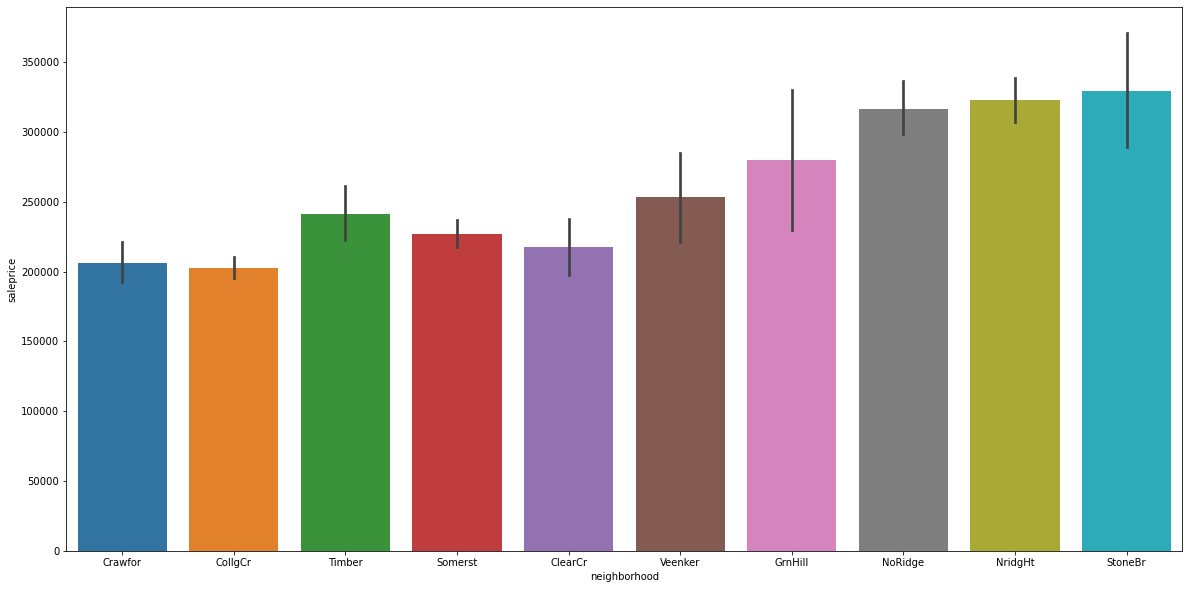

In [56]:
plt.figure(figsize = (20,10))
result = df_train.groupby(["neighborhood"])['saleprice'].aggregate(np.median).reset_index().sort_values('saleprice')[18:]
sns.barplot(x='neighborhood', y="saleprice", data=df_train, order=result['neighborhood']);
plt.savefig('Images/location.png')

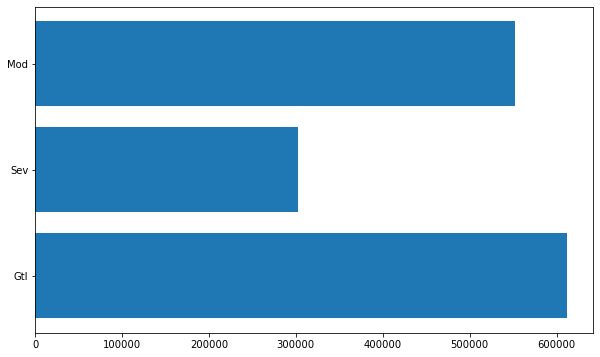

In [57]:
y = df_train['saleprice']
X = df_train[['land_slope']]
plt.figure(figsize = (10,6))
plt.barh(y = df_train['land_slope'], width = df_train['saleprice']);

In [58]:
features = [col for col in df_train._get_numeric_data().columns if col != 'saleprice']
X = df_train[features]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, df_train['saleprice'], random_state = 42)

In [60]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Testing Score: {lr.score(X_test, y_test)}, Training Score: {lr.score(X_train, y_train)}')
predictions = lr.predict(X_test)

Testing Score: 0.848146354819737, Training Score: 0.8340507036130209


In [61]:
mean_squared_error(y_test, predictions, squared = False), mean_squared_error(y_train, lr.predict(X_train), squared = False)

(28093.27290297308, 32758.115607659085)

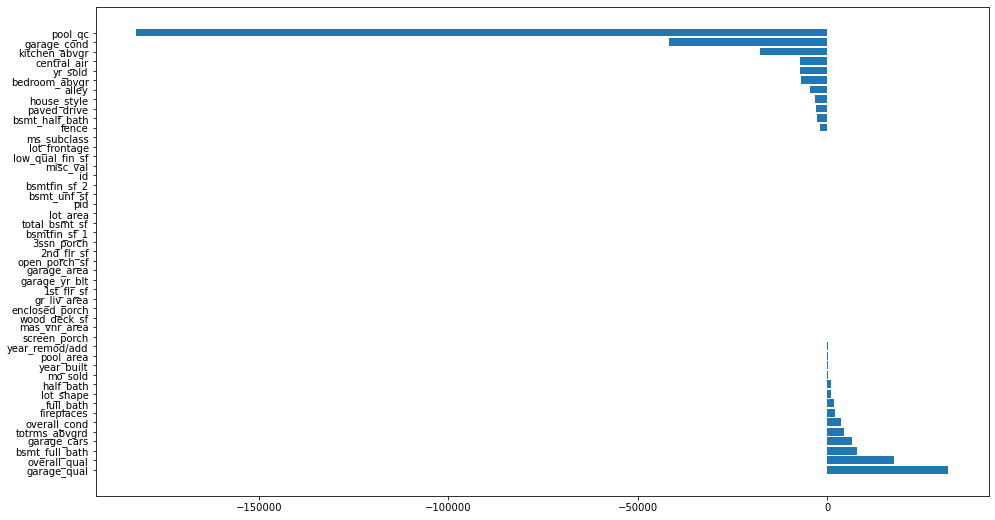

In [62]:
coef_df = pd.DataFrame({
    'col_name': X.columns,
    'coef': lr.coef_
})
coef_df = coef_df.sort_values(by = 'coef', ascending = False)
plt.figure(figsize = (16,9))
plt.barh(y = coef_df['col_name'], width = coef_df['coef']);

In [63]:
X_1 = pd.get_dummies(columns = ['neighborhood'], drop_first = True, data = df_train['neighborhood'])
y = df_train['saleprice']
X_1.head()

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,Greens,GrnHill,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y, random_state = 42)

In [65]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Testing Score: {lr.score(X_test, y_test)}, Training Score: {lr.score(X_train, y_train)}')
predictions = lr.predict(X_test)

Testing Score: 0.5350475214700452, Training Score: 0.5825287606512262


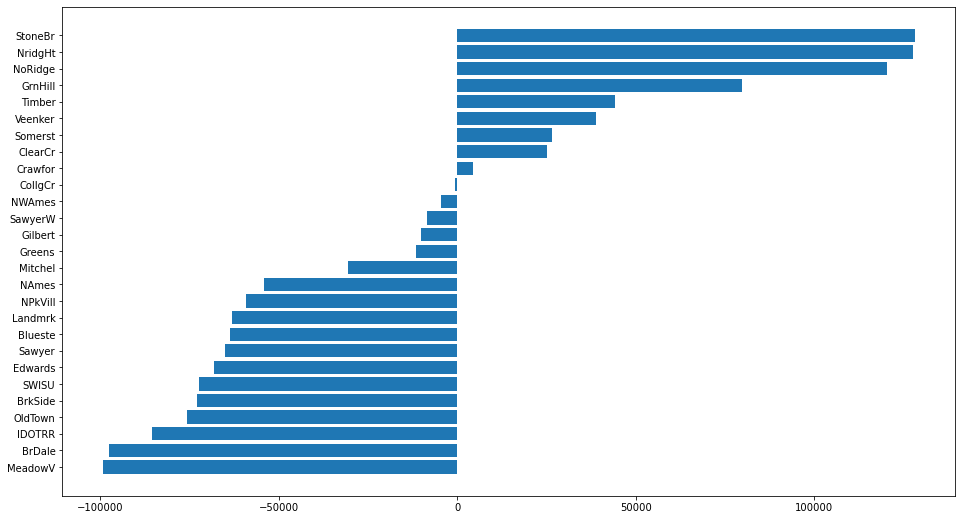

In [66]:
coef_df = pd.DataFrame({
    'col_name': X_1.columns,
    'coef': lr.coef_
})
coef_df = coef_df.sort_values(by = 'coef', ascending = True)
plt.figure(figsize = (16,9))
plt.barh(y = coef_df['col_name'], width = coef_df['coef']);
plt.savefig('Images/neighborhood.png')

In [67]:
X_2 = pd.get_dummies(columns = ['house_style'], drop_first = True, data = df_train['house_style'])
y = df_train['saleprice']
X_2.head()

,1,2
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y, random_state = 42)
lr = LinearRegression()
lr.fit(X_train, y_train)
print(f'Testing Score: {lr.score(X_test, y_test)}, Training Score: {lr.score(X_train, y_train)}')
predictions = lr.predict(X_test)

Testing Score: 0.02974721951359871, Training Score: 0.04504926705078338


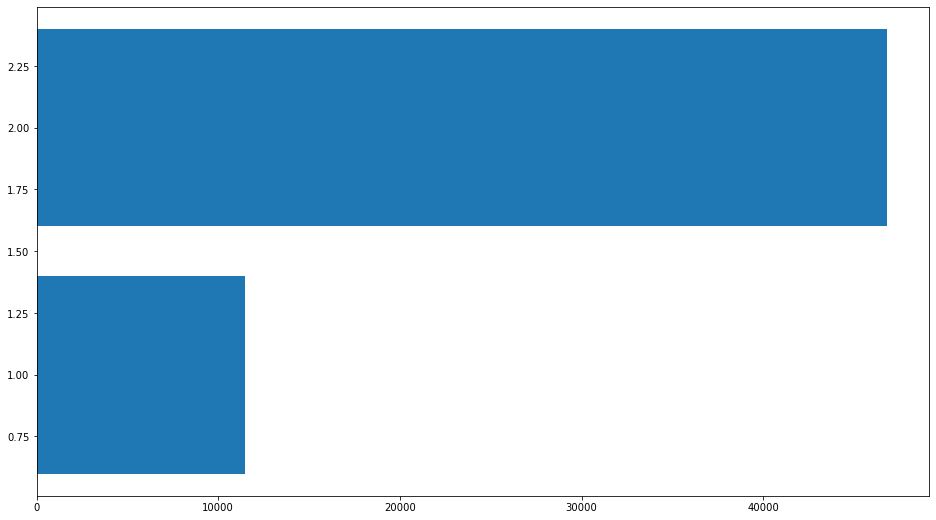

In [69]:
coef_df = pd.DataFrame({
    'col_name': X_2.columns,
    'coef': lr.coef_
})
coef_df = coef_df.sort_values(by = 'coef', ascending = True)
plt.figure(figsize = (16,9))
plt.barh(y = coef_df['col_name'], width = coef_df['coef']);
plt.savefig('Images/HouseStyle.png')